# Demo of a KDE plot beside timeseries set

In [11]:
%pylab inline
import pysd
import numpy as np
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


### Load the model using PySD
The model is a basic, 1-stock carbon bathtub model

In [8]:
model = pysd.read_vensim('../../models/Climate/Atmospheric_Bathtub.mdl')
print model.doc()

|    | name                      | modelName                 | unit        | comment                                    |
|----+---------------------------+---------------------------+-------------+--------------------------------------------|
|  0 | Emissions                 | emissions                 |             | nan                                        |
|  1 | Excess Atmospheric Carbon | excess_atmospheric_carbon |             | nan                                        |
|  2 | FINAL TIME                | final_time                | Month       | The final time for the simulation.         |
|  3 | INITIAL TIME              | initial_time              | Month       | The initial time for the simulation.       |
|  4 | Natural Removal           | natural_removal           |             | nan                                        |
|  5 | Removal Constant          | removal_constant          |             | nan                                        |
|  6 | SAVEPER          

### Generate a set of parameters to use as input
Here, drawing 1000 constant values for the `Emissions` parameter from an exponential distribution

In [3]:
n_runs = 1000
runs = pd.DataFrame({'Emissions': np.random.exponential(scale=10000, size=n_runs)})
runs.head()

,Emissions
0,754.742333
1,14749.039754
2,7241.957594
3,4284.263487
4,22376.864579


### Run the model with the various parameters

In [4]:
result = runs.apply(lambda p: model.run(params=dict(p))['Excess Atmospheric Carbon'],
                    axis=1).T
result.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,754.742333,14749.039754,7241.957594,4284.263487,22376.864579,8302.073685,23364.988335,9642.752933,9246.002982,29150.232322,...,6422.187598,10433.929055,5228.257878,29585.251330,7903.097871,7765.682923,5425.788505,8576.242429,18934.396132,3688.825398
2.0,1501.937242,29350.589111,14411.495612,8525.684340,44529.960511,16521.126633,46496.326786,19189.078336,18399.545933,58008.962321,...,12780.153321,20763.518819,10404.233177,58874.650147,15727.164763,15453.709018,10797.319125,17066.722433,37679.448302,7340.762543
3.0,2241.660202,43806.122973,21509.338250,12724.690984,66461.525485,24657.989052,69396.351853,28639.940486,27461.553456,86579.105020,...,19074.539386,30989.812686,15528.448722,87871.154975,23472.990987,23064.854851,16115.134440,25472.297638,56237.049950,10956.180316
4.0,2973.985933,58117.101498,28536.202462,16881.707561,88173.774809,32713.482847,92067.376669,37996.294014,36432.940903,114863.546291,...,25305.981590,41113.843614,20601.422113,116577.694755,31141.358948,30599.889226,21379.771600,33793.817090,74609.075583,14535.443911


### Draw a plot showing the results, and a marginal density plot

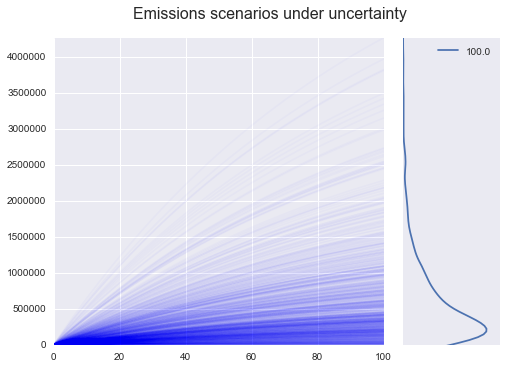

In [5]:
# left side should have all traces plotted
plt.subplot2grid((1,4), loc=(0,0), colspan=3)
[plt.plot(result.index, result[i], 'b', alpha=.02) for i in result.columns]
plt.ylim(0, max(result.iloc[-1]))

# right side has gaussian KDE on last timestamp
plt.subplot2grid((1,4), loc=(0,3))
seaborn.kdeplot(result.iloc[-1], vertical=True)
plt.ylim(0, max(result.iloc[-1]));
plt.yticks([])
plt.xticks([])

plt.suptitle('Emissions scenarios under uncertainty', fontsize=16);